<a href="https://colab.research.google.com/github/EarlyOcean/PCD_Assignment03/blob/main/PCD_Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

!rm -rf PCD_Assignment03
!git clone https://github.com/EarlyOcean/PCD_Assignment03

def show_image(img, title):
  plt.figure(figsize=(6,6))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.axis("off")
  plt.show()

Cloning into 'PCD_Assignment03'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 53.91 KiB | 716.00 KiB/s, done.
Resolving deltas: 100% (2/2), done.


# Preprocessing


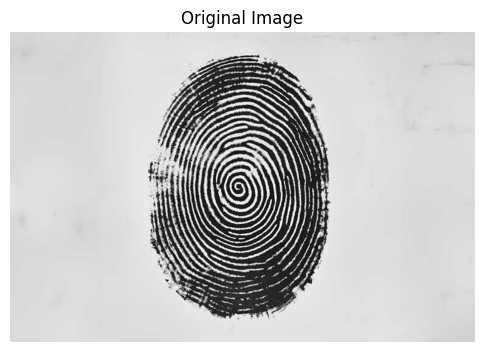

In [52]:
# original image of a fingerprint
original_img = cv2.cvtColor(cv2.imread("/content/PCD_Assignment03/fingerprint.jpg"), cv2.COLOR_BGR2GRAY)
show_image(original_img, "Original Image")

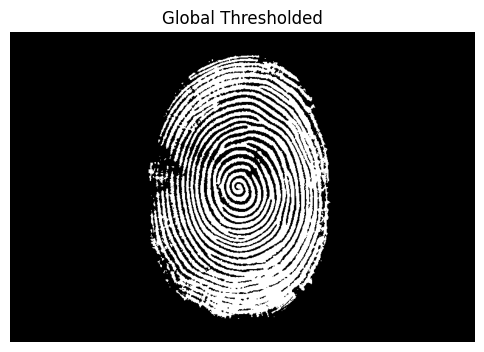

In [49]:
# segmentation by global thresholding
threshold = 127
img_array = np.array(original_img)
img_thresholded = np.zeros_like(img_array)

for i in range(img_array.shape[0]):        # height
    for j in range(img_array.shape[1]):    # width
        if img_array[i, j] > threshold:
            img_thresholded[i, j] = 0
        else:
            img_thresholded[i, j] = 255

show_image(img_thresholded, "Global Thresholded")

# Morphological Operations


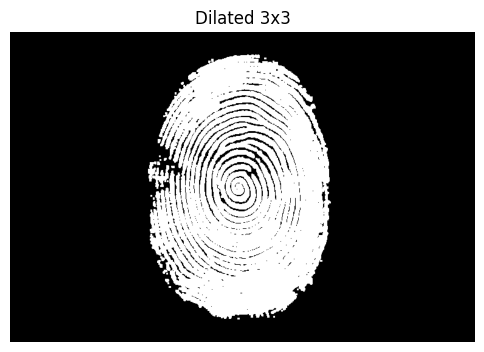

In [50]:
# dilation using 3x3 kernel

def dilationSquare(img):
  kernel = [ # [row, column]
    [-1,1],[-1,0],[-1,-1],
    [0,-1],[0,0],[0,1],
    [1,-1],[1,0],[1,1]
  ]

  pad = 1

  padded = np.pad(img_thresholded, pad, mode='constant', constant_values=0)
  result = np.zeros_like(img_thresholded)

  for i in range(pad, padded.shape[0] - pad):
      for j in range(pad, padded.shape[1] - pad):
          found = False
          for k in range(len(kernel)):
            x = kernel[k][0] + i
            y = kernel[k][1] + j
            if padded[x, y] == 255:
              found = True
              break

          if found:
              result[i - pad, j - pad] = 255
          else:
              result[i - pad, j - pad] = 0

  return result

img_dilated = dilationSquare(img_thresholded)
show_image(img_dilated, "Dilated 3x3")

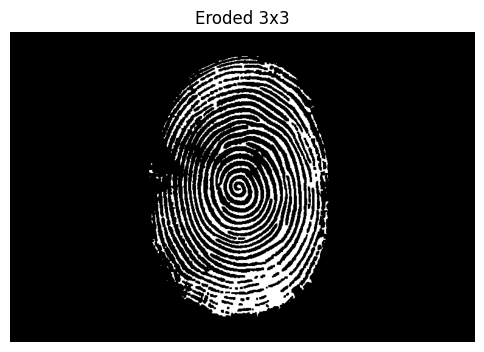

In [51]:
# erosion using 3x3 kernel

def erosionSquare(img):
  kernel = [ # [row, column]
    [-1,1],[-1,0],[-1,-1],
    [0,-1],[0,0],[0,1],
    [1,-1],[1,0],[1,1]
  ]

  pad = 1

  padded = np.pad(img_thresholded, pad, mode='constant', constant_values=0)
  result = np.zeros_like(img_thresholded)

  for i in range(pad, padded.shape[0] - pad):
      for j in range(pad, padded.shape[1] - pad):
          all = True
          for k in range(len(kernel)):
            x = kernel[k][0] + i
            y = kernel[k][1] + j
            if padded[x, y] == 0:
              all = False
              break

          if all:
              result[i - pad, j - pad] = 255
          else:
              result[i - pad, j - pad] = 0

  return result

img_eroded = erosionSquare(img_thresholded)
show_image(img_eroded, "Eroded 3x3")

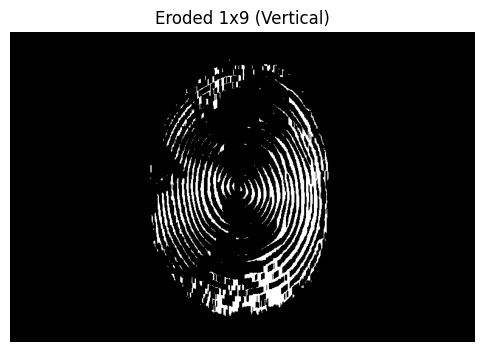

In [61]:
# erosion vertical using 1x9 kernel

def erosionVertical(img):
  kernel = [ # [row, column]
    [4,0],
    [3,0],
    [2,0],
    [1,0],
    [0,0],
    [-1,0],
    [-2,0],
    [-3,0],
    [-4,0]
  ]

  pad = 4

  padded = np.pad(img_thresholded, pad, mode='constant', constant_values=0)
  result = np.zeros_like(img_thresholded)

  for i in range(pad, padded.shape[0] - pad):
      for j in range(pad, padded.shape[1] - pad):
          all = True
          for k in range(len(kernel)):
            x = kernel[k][0] + i
            y = kernel[k][1] + j
            if padded[x, y] == 0:
              all = False
              break

          if all:
              result[i - pad, j - pad] = 255
          else:
              result[i - pad, j - pad] = 0

  return result

img_erodedV = erosionVertical(img_thresholded)
show_image(img_erodedV, "Eroded 1x9 (Vertical)")

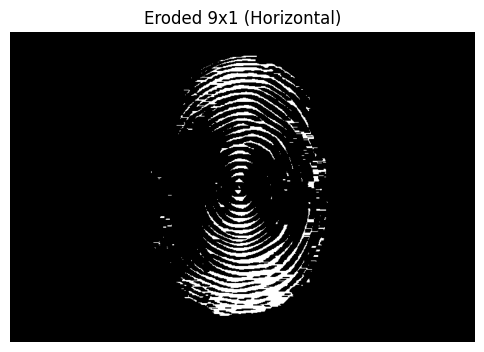

In [60]:
# erosion horizontal using 9x1 kernel

def erosionHorizontal(img):
  kernel = [ # [row, column]
    [0,4],[0,3],[0,2],[0,1], [0,0],[0,-1],[0,-2],[0,-3],[0,-4]
  ]

  pad = 4

  padded = np.pad(img_thresholded, pad, mode='constant', constant_values=0)
  result = np.zeros_like(img_thresholded)

  for i in range(pad, padded.shape[0] - pad):
      for j in range(pad, padded.shape[1] - pad):
          all = True
          for k in range(len(kernel)):
            x = kernel[k][0] + i
            y = kernel[k][1] + j
            if padded[x, y] == 0:
              all = False
              break

          if all:
              result[i - pad, j - pad] = 255
          else:
              result[i - pad, j - pad] = 0

  return result

img_erodedH = erosionHorizontal(img_thresholded)
show_image(img_erodedH, "Eroded 9x1 (Horizontal)")

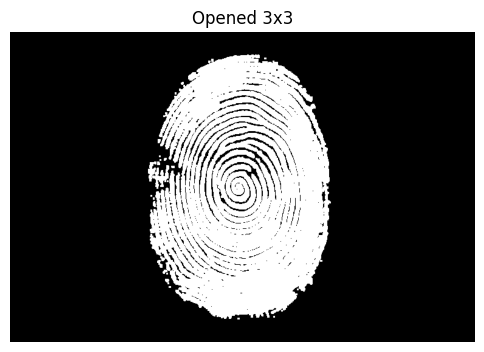

In [55]:
# opening using 3x3 kernel

def openingSquare(img):
  eroded = erosionSquare(img)
  result = dilationSquare(eroded)
  return result

img_opened = openingSquare(img_thresholded)
show_image(img_opened, "Opened 3x3")

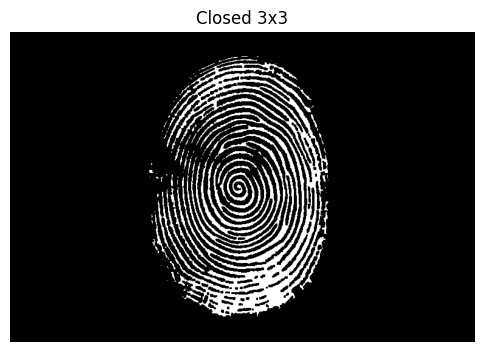

In [56]:
# closing using 3x3 kernel

def closingSquare(img):
  dilated = dilationSquare(img)
  result = erosionSquare(dilated)
  return result

img_closed = closingSquare(img_thresholded)
show_image(img_closed, "Closed 3x3")